In [5]:
import matplotlib.pyplot as plt
import cfe.regression as rgsn
import numpy as np
import matplotlib.cm
from scipy.stats import gaussian_kde as kde
from cfe.df_utils import use_indices

In [6]:
r = rgsn.read_pickle('./data/preferred.rgsn')

In [7]:
xbar = r.predicted_expenditures().groupby(['i','t','m']).sum()
f = kde(xbar)

x99 = xbar.quantile(0.99)
x99 = xbar.quantile(1)

Y = np.geomspace(1,x99,100)

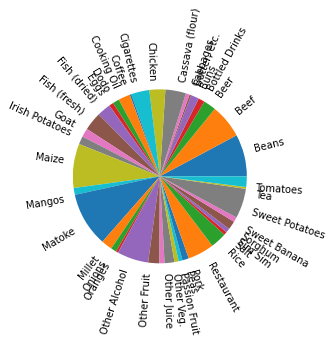

In [12]:
# Unconditional probability non-missing by good
p = ((r.y.unstack('j')>0) + 0.).mean()

fig,ax = plt.subplots()

shares = r.predicted_expenditures().groupby('j').sum()*p

ax.pie(shares,labels=shares.index.tolist(),rotatelabels=True)
ax.get_figure().savefig('./out/engel_pie-0.png')

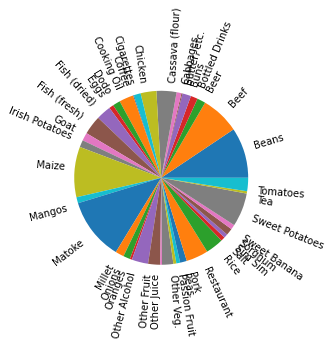

In [13]:
fig,ax = plt.subplots()

shares = (r.predicted_expenditures()*p/xbar).groupby('j').mean()

ax.pie(shares,labels=shares.index.tolist(),rotatelabels=True)
ax.get_figure().savefig('./out/engel_pie-1.png')

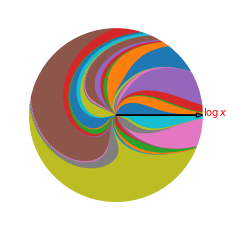

In [14]:
fig,ax = plt.subplots()

for i in range(len(Y)-1,0,-1):
    ax.pie(r.expenditures(Y[i])*p,radius=np.log(Y[i])/np.log(x99))

ax.arrow(0,0,1,0,shape='full',head_width=.05,length_includes_head=True)
ax.annotate(r"$\log x$", xy=(1,0),color='red')

ax.get_figure().savefig('./out/engel_pie-2.png')

In [15]:
def circle(r):
    angles = np.linspace(0,2*np.pi,100)
    return r*np.cos(angles),r*np.sin(angles)

def point_on_circle(theta,r):
    return r*np.cos(theta),r*np.sin(theta)

In [17]:
# Add quantiles
ax.plot(*circle(np.log(xbar.quantile(0.01))/np.log(x99)),'k')
ax.plot(*circle(np.log(xbar.quantile(0.5))/np.log(x99)),'k')
ax.plot(*circle(np.log(xbar.quantile(0.99))/np.log(x99)),'k')

ax.annotate("99%", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.99))/np.log(x99)), xytext=(.9, 1.1), arrowprops=dict(arrowstyle="->"))
ax.annotate("Median", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.5))/np.log(x99)), xytext=(1, 1), arrowprops=dict(arrowstyle="->"))
ax.annotate("1%", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.01))/np.log(x99)), xytext=(1.1, 0.9), arrowprops=dict(arrowstyle="->"))

ax.get_figure().savefig('./out/engel_pie-3.png')

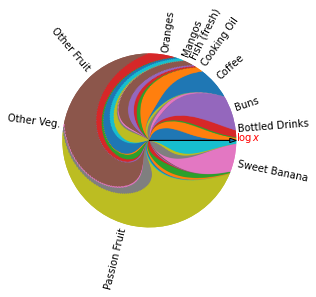

In [18]:
# Redo entire pie, with good labels

fig,ax = plt.subplots()

# Select labels that will fit
shares = r.expenditures(Y[-1])*p
shares = shares/shares.sum()
labels = use_indices(shares,['j'])
labels['shares'] = shares
labels = labels.j.where(labels.shares>0.01,'').tolist()

ax.pie(shares,labels=labels,rotatelabels=True,labeldistance=1.02)

for i in range(len(Y)-1,0,-1):
    ax.pie(r.expenditures(Y[i])*p,radius=np.log(Y[i])/np.log(x99))

ax.arrow(0,0,1,0,shape='full',head_width=.05,length_includes_head=True)
ax.annotate(r"$\log x$", xy=(1,0),color='red')

ax.get_figure().savefig('./out/engel_pie-4.png')

In [19]:
# Add quantiles
ax.plot(*circle(np.log(xbar.quantile(0.01))/np.log(x99)),'k')
ax.plot(*circle(np.log(xbar.quantile(0.5))/np.log(x99)),'k')
ax.plot(*circle(np.log(xbar.quantile(0.99))/np.log(x99)),'k')

ax.annotate("99%", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.99))/np.log(x99)), xytext=(.9, 1.1), arrowprops=dict(arrowstyle="->"))
ax.annotate("Median", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.5))/np.log(x99)), xytext=(1, 1), arrowprops=dict(arrowstyle="->"))
ax.annotate("1%", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.01))/np.log(x99)), xytext=(1.1, 0.9), arrowprops=dict(arrowstyle="->"))

ax.get_figure().savefig('./out/engel_pie-5.png')